In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'D:data\space.csv')

In [3]:
df.head()

objid          ra       dec         u         g         r         i  \
0  1.237650e+18  183.531326  0.089693  19.47406  17.04240  15.94699  15.50342   
1  1.237650e+18  183.598371  0.135285  18.66280  17.21449  16.67637  16.48922   
2  1.237650e+18  183.680207  0.126185  19.38298  18.19169  17.47428  17.08732   
3  1.237650e+18  183.870529  0.049911  17.76536  16.60272  16.16116  15.98233   
4  1.237650e+18  183.883288  0.102557  17.55025  16.26342  16.43869  16.55492   

          z  run  rerun  camcol  field     specobjid   class  redshift  plate  \
0  15.22531  752    301       4    267  3.722360e+18    STAR -0.000009   3306   
1  16.39150  752    301       4    267  3.638140e+17    STAR -0.000055    323   
2  16.80125  752    301       4    268  3.232740e+17  GALAXY  0.123111    287   
3  15.90438  752    301       4    269  3.722370e+18    STAR -0.000111   3306   
4  16.61326  752    301       4    269  3.722370e+18    STAR  0.000590   3306   

     mjd  fiberid  
0  54922      491  
1  51615      541  
2  52023      513  
3  54922      510  
4  54922      512

Column detail:
* objid = Object Identifier.
* ra = J2000 Right Ascension (r-band).
* dec = J2000 Declination (r-band).
* u = better of DeV/Exp magnitude fit.
* g = better of DeV/Exp magnitude fit.
* r = better of DeV/Exp magnitude fit.
* i = better of DeV/Exp magnitude fit.
* z = better of DeV/Exp magnitude fit.
* run = Run Number.
* rereun = Rerun Number.
* camcol = Camera column.
* field = Field number.
* specobjid = Object Identifier.
* class = object class (galaxy, star or quasar object).
* redshift = Final Redshift.
* plate = plate number.
* mjd = MJD of observation.
* fiberid = fiber ID.

In [4]:
df.shape

(10000, 18)

In [5]:
df.columns

Index(['objid', 'ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'rerun', 'camcol',
       'field', 'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   objid      10000 non-null  float64
 1   ra         10000 non-null  float64
 2   dec        10000 non-null  float64
 3   u          10000 non-null  float64
 4   g          10000 non-null  float64
 5   r          10000 non-null  float64
 6   i          10000 non-null  float64
 7   z          10000 non-null  float64
 8   run        10000 non-null  int64  
 9   rerun      10000 non-null  int64  
 10  camcol     10000 non-null  int64  
 11  field      10000 non-null  int64  
 12  specobjid  10000 non-null  float64
 13  class      10000 non-null  object 
 14  redshift   10000 non-null  float64
 15  plate      10000 non-null  int64  
 16  mjd        10000 non-null  int64  
 17  fiberid    10000 non-null  int64  
dtypes: float64(10), int64(7), object(1)
memory usage: 1.4+ MB


* The dataset has shape with 10000 rows & 18 columns.
* The dataset has 10 float64 , 7 int64 & 1 object as datatype columns.
* The dataset has no null values

In [7]:
# Summary Statistics

In [8]:
df.describe(include='all')

objid            ra           dec             u             g  \
count   1.000000e+04  10000.000000  10000.000000  10000.000000  10000.000000   
unique           NaN           NaN           NaN           NaN           NaN   
top              NaN           NaN           NaN           NaN           NaN   
freq             NaN           NaN           NaN           NaN           NaN   
mean    1.237650e+18    175.529987     14.836148     18.619355     17.371931   
std     1.577039e+05     47.783439     25.212207      0.828656      0.945457   
min     1.237650e+18      8.235100     -5.382632     12.988970     12.799550   
25%     1.237650e+18    157.370946     -0.539035     18.178035     16.815100   
50%     1.237650e+18    180.394514      0.404166     18.853095     17.495135   
75%     1.237650e+18    201.547279     35.649397     19.259232     18.010145   
max     1.237650e+18    260.884382     68.542265     19.599900     19.918970   

                   r             i             z           run    rerun  \
count   10000.000000  10000.000000  10000.000000  10000.000000  10000.0   
unique           NaN           NaN           NaN           NaN      NaN   
top              NaN           NaN           NaN           NaN      NaN   
freq             NaN           NaN           NaN           NaN      NaN   
mean       16.840963     16.583579     16.422833    981.034800    301.0   
std         1.067764      1.141805      1.203188    273.305024      0.0   
min        12.431600     11.947210     11.610410    308.000000    301.0   
25%        16.173333     15.853705     15.618285    752.000000    301.0   
50%        16.858770     16.554985     16.389945    756.000000    301.0   
75%        17.512675     17.258550     17.141447   1331.000000    301.0   
max        24.802040     28.179630     22.833060   1412.000000    301.0   

              camcol         field     specobjid   class      redshift  \
count   10000.000000  10000.000000  1.000000e+04   10000  10000.000000   
unique           NaN           NaN           NaN       3           NaN   
top              NaN           NaN           NaN  GALAXY           NaN   
freq             NaN           NaN           NaN    4998           NaN   
mean        3.648700    302.380100  1.645022e+18     NaN      0.143726   
std         1.666183    162.577763  2.013998e+18     NaN      0.388774   
min         1.000000     11.000000  2.995780e+17     NaN     -0.004136   
25%         2.000000    184.000000  3.389248e+17     NaN      0.000081   
50%         4.000000    299.000000  4.966580e+17     NaN      0.042591   
75%         5.000000    414.000000  2.881300e+18     NaN      0.092579   
max         6.000000    768.000000  9.468830e+18     NaN      5.353854   

               plate           mjd       fiberid  
count   10000.000000  10000.000000  10000.000000  
unique           NaN           NaN           NaN  
top              NaN           NaN           NaN  
freq             NaN           NaN           NaN  
mean     1460.986400  52943.533300    353.069400  
std      1788.778371   1511.150651    206.298149  
min       266.000000  51578.000000      1.000000  
25%       301.000000  51900.000000    186.750000  
50%       441.000000  51997.000000    351.000000  
75%      2559.000000  54468.000000    510.000000  
max      8410.000000  57481.000000   1000.000000

In [9]:
df['class'].unique()

array(['STAR', 'GALAXY', 'QSO'], dtype=object)

In [10]:
df['class'].value_counts()

GALAXY    4998
STAR      4152
QSO        850
Name: class, dtype: int64

In [11]:
df['rerun'].unique()

array([301], dtype=int64)

In [12]:
df['run'].unique()

array([ 752,  756,  308,  727,  745, 1035, 1045, 1140, 1231, 1332, 1334,
       1302, 1239, 1119, 1331, 1345, 1350, 1404, 1412, 1336, 1402, 1411,
       1356], dtype=int64)

In [13]:
df['objid'].unique()

array([1.23765e+18])

In [14]:
df['rerun'].value_counts()

301    10000
Name: rerun, dtype: int64

* The 'class' column has 3 types of data 'STAR','GALAXY' & 'QSQ'.
* The value counts of these values are 'STAR' : 4998 ,'GALAXY' : 4152 & 'QSQ' : 850.
* The 'rerun' column has only one value i.e 301.
* The 'objid' column has only one value i.e 1.23765e+18.
* The otliers are present in the dataset.
* Skewness is also present the dataset.

In [15]:
# Data Visualation

In [16]:
df.isnull().head()

objid     ra    dec      u      g      r      i      z    run  rerun  \
0  False  False  False  False  False  False  False  False  False  False   
1  False  False  False  False  False  False  False  False  False  False   
2  False  False  False  False  False  False  False  False  False  False   
3  False  False  False  False  False  False  False  False  False  False   
4  False  False  False  False  False  False  False  False  False  False   

   camcol  field  specobjid  class  redshift  plate    mjd  fiberid  
0   False  False      False  False     False  False  False    False  
1   False  False      False  False     False  False  False    False  
2   False  False      False  False     False  False  False    False  
3   False  False      False  False     False  False  False    False  
4   False  False      False  False     False  False  False    False

In [17]:
df.isnull().sum()

objid        0
ra           0
dec          0
u            0
g            0
r            0
i            0
z            0
run          0
rerun        0
camcol       0
field        0
specobjid    0
class        0
redshift     0
plate        0
mjd          0
fiberid      0
dtype: int64

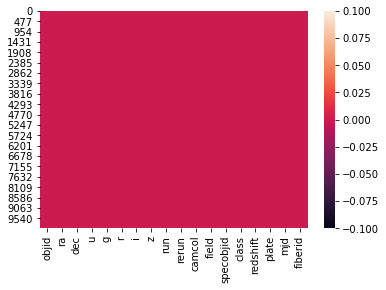

In [18]:
sns.heatmap(df.isnull())

* The dataset shows has no null values.

In [19]:
#changing the data

In [20]:
df['class']=df['class'].map({'STAR':0,'GALAXY':1,'QSO':2})

In [21]:
df['class'].unique()

array([0, 1, 2], dtype=int64)

In [22]:
df['class'].dtypes

dtype('int64')

* The column 'class' has 3 unique values.The classification data is now converted into numerical data.

In [23]:
df.corr()

objid            ra           dec             u  \
objid      1.000000e+00  2.524419e-14 -1.937483e-15  5.581214e-14   
ra         2.524419e-14  1.000000e+00  3.596046e-03  3.123756e-02   
dec       -1.937483e-15  3.596046e-03  1.000000e+00  3.527932e-02   
u          5.581214e-14  3.123756e-02  3.527932e-02  1.000000e+00   
g          1.001149e-13  4.390863e-02  6.187471e-02  8.492320e-01   
r          2.995673e-14  4.710290e-02  6.340395e-02  6.923790e-01   
i          2.212198e-14  4.573107e-02  5.829189e-02  6.026302e-01   
z         -4.107700e-14  4.294957e-02  5.687030e-02  5.514828e-01   
run       -1.553011e-14 -9.274056e-02  7.783849e-01  3.822910e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.921887e-15 -6.293831e-03  1.146139e-01  9.944672e-03   
field      5.938881e-16  5.946996e-01 -1.314714e-01  8.547880e-03   
specobjid -1.829075e-15 -9.532711e-02  8.834533e-02 -1.294293e-01   
class      1.442555e-15  4.118918e-02  9.124866e-02  2.845415e-01   
redshift   5.085882e-16  3.030740e-02  6.702076e-02  1.637409e-01   
plate      4.156934e-16 -9.532933e-02  8.834153e-02 -1.294304e-01   
mjd       -3.317582e-15 -8.688726e-02  6.614663e-02 -1.687927e-01   
fiberid    4.665195e-15  5.748482e-02  1.550124e-01  1.130112e-02   

                      g             r             i             z  \
objid      1.001149e-13  2.995673e-14  2.212198e-14 -4.107700e-14   
ra         4.390863e-02  4.710290e-02  4.573107e-02  4.294957e-02   
dec        6.187471e-02  6.340395e-02  5.829189e-02  5.687030e-02   
u          8.492320e-01  6.923790e-01  6.026302e-01  5.514828e-01   
g          1.000000e+00  9.581062e-01  9.074187e-01  8.796222e-01   
r          9.581062e-01  1.000000e+00  9.776718e-01  9.691967e-01   
i          9.074187e-01  9.776718e-01  1.000000e+00  9.815066e-01   
z          8.796222e-01  9.691967e-01  9.815066e-01  1.000000e+00   
run        5.844630e-02  5.726060e-02  4.976478e-02  4.825225e-02   
rerun               NaN           NaN           NaN           NaN   
camcol     1.022304e-02  1.074725e-02  1.346079e-02  1.092981e-02   
field      1.465110e-02  1.713294e-02  1.978147e-02  1.824845e-02   
specobjid -5.497908e-02  1.978831e-02  7.295994e-02  1.123981e-01   
class      3.573522e-01  2.786783e-01  2.053670e-01  1.494443e-01   
redshift   4.075763e-01  4.410797e-01  4.314500e-01  4.240342e-01   
plate     -5.498078e-02  1.978671e-02  7.295843e-02  1.123969e-01   
mjd       -9.277155e-02 -9.344506e-03  5.089616e-02  9.565845e-02   
fiberid    4.718739e-02  6.108141e-02  6.997739e-02  6.797999e-02   

                    run  rerun        camcol         field     specobjid  \
objid     -1.553011e-14    NaN  1.921887e-15  5.938881e-16 -1.829075e-15   
ra        -9.274056e-02    NaN -6.293831e-03  5.946996e-01 -9.532711e-02   
dec        7.783849e-01    NaN  1.146139e-01 -1.314714e-01  8.834533e-02   
u          3.822910e-02    NaN  9.944672e-03  8.547880e-03 -1.294293e-01   
g          5.844630e-02    NaN  1.022304e-02  1.465110e-02 -5.497908e-02   
r          5.726060e-02    NaN  1.074725e-02  1.713294e-02  1.978831e-02   
i          4.976478e-02    NaN  1.346079e-02  1.978147e-02  7.295994e-02   
z          4.825225e-02    NaN  1.092981e-02  1.824845e-02  1.123981e-01   
run        1.000000e+00    NaN  1.518143e-01 -4.638975e-01  9.360436e-02   
rerun               NaN    NaN           NaN           NaN           NaN   
camcol     1.518143e-01    NaN  1.000000e+00 -6.792055e-02  4.080943e-02   
field     -4.638975e-01    NaN -6.792055e-02  1.000000e+00 -9.372375e-02   
specobjid  9.360436e-02    NaN  4.080943e-02 -9.372375e-02  1.000000e+00   
class      1.006273e-01    NaN  1.026907e-02 -2.610148e-03 -4.660012e-01   
redshift   5.905595e-02    NaN  6.833537e-03  1.541360e-02 -3.808992e-02   
plate      9.360107e-02    NaN  4.079461e-02 -9.372323e-02  1.000000e+00   
mjd        7.035433e-02    NaN  2.628396e-02 -8.655805e-02  9.668799e-01   
fiberid    1.385659e-01   

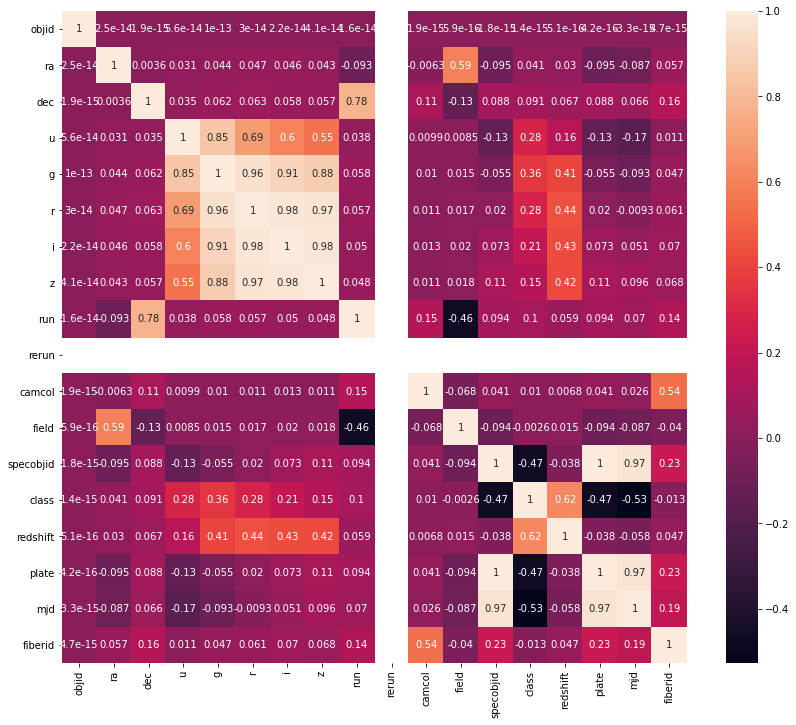

In [24]:
plt.figure(figsize=(14,12))
sns.heatmap(df.corr(),annot=True)

* The 'specobjid','plate'& 'mjd' is most negetively correlated & column 'redshift' are most positively correlated with the column "class".
* The 'rerun' column shows no correlation with the column 'class' as it contain only one type of value ,hence in heatmap is showing  white colour.

In [25]:
# Drop the columns

In [26]:
df.drop('rerun',axis=1,inplace=True)

In [27]:
df.shape

(10000, 17)

* The column 'rerun' has only one type of value hence the data is mostly irrelevent.
* Hence the column ''rerun is removed from the dataset.

In [28]:
df.drop('objid',axis=1,inplace=True)

* The column 'objid'is removed from the dataset because it containsonly one type of value, Hence this column is irrelevant.

In [29]:
# Univarient & Bivarient analysis

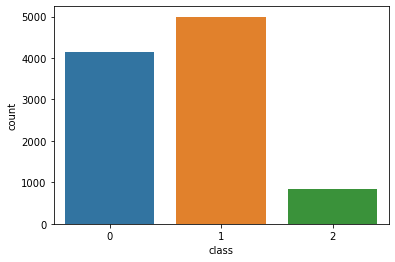

In [30]:
sns.countplot(df['class'])

* The highest no of objects in the space are Galaxy.

In [33]:
df.columns

Index(['ra', 'dec', 'u', 'g', 'r', 'i', 'z', 'run', 'camcol', 'field',
       'specobjid', 'class', 'redshift', 'plate', 'mjd', 'fiberid'],
      dtype='object')

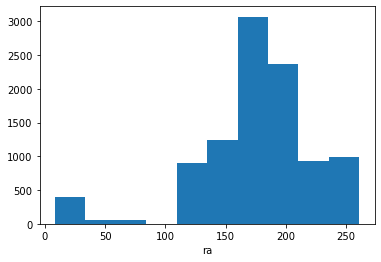

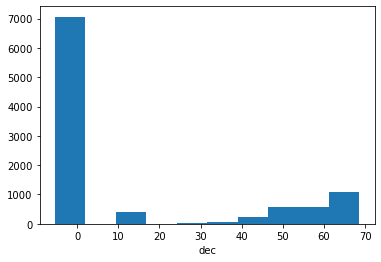

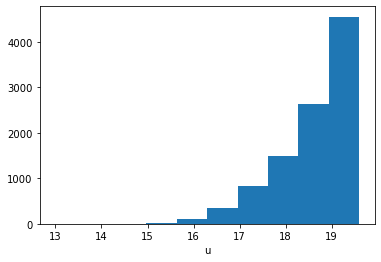

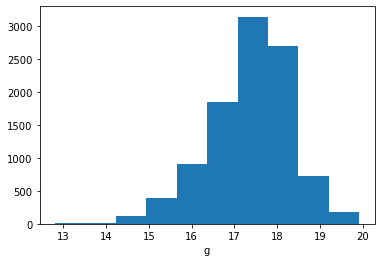

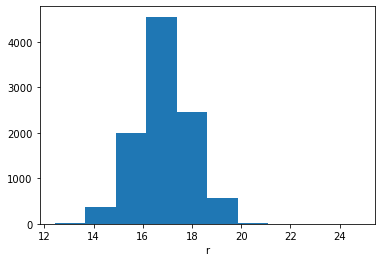

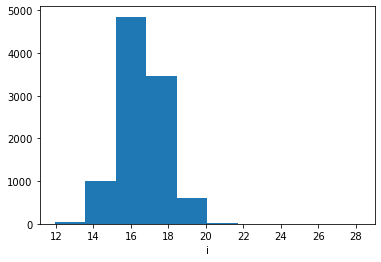

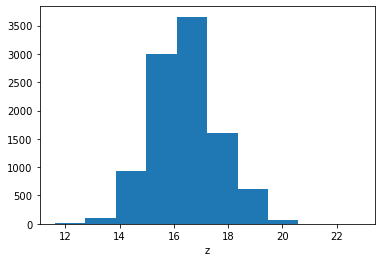

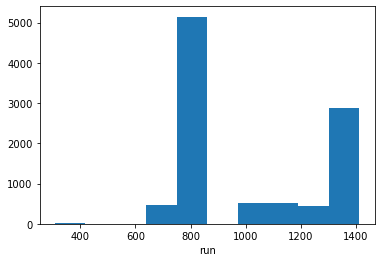

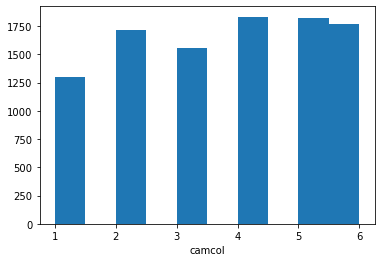

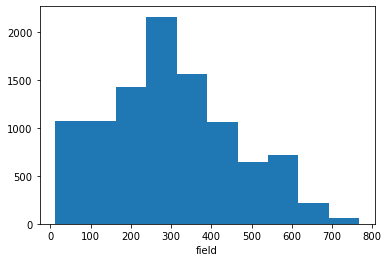

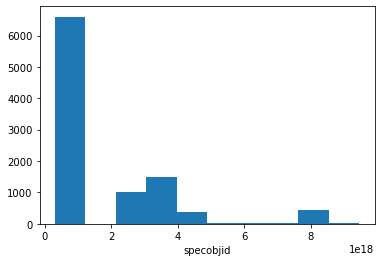

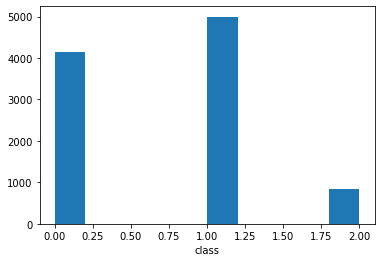

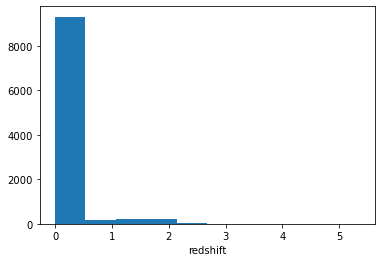

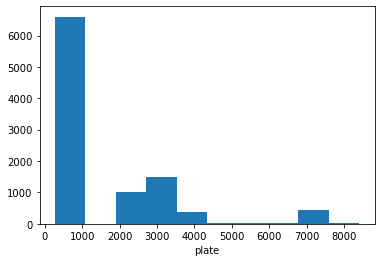

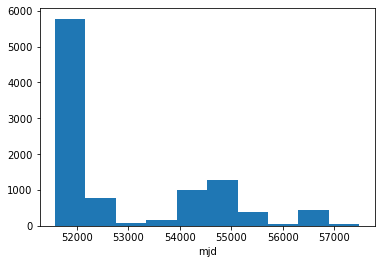

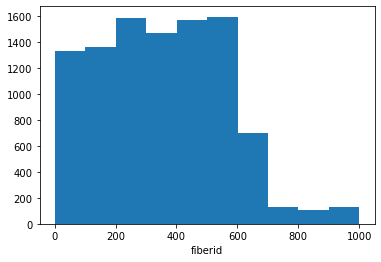

<Figure size 432x288 with 0 Axes>

In [39]:
for i in df.columns:
    plt.hist(df[i])
    plt.xlabel(i)
    plt.figure()

* The column 'ra' has highest values between 150-200.
* The column 'dec' has highest values at 0.
* The column 'u' has highest values above 19.
* The column 'g' has highest values between  17-18.
* The column 'r' has highest values between  16-18.
* The column 'i' has highest values between  15-17.
* The column 'z' has highest values between  16-17.
* The column 'run' has highest values between 750-850.
* The column 'camcol' has highest values between 5-6.
* The column 'field' has highest values between 250-300.
* The column 'specobjid' has highest values between 0-1.
* The column 'redshift' has highest values between 0-0.5.

ra              AxesSubplot(0.125,0.536818;0.0731132x0.343182)
dec          AxesSubplot(0.212736,0.536818;0.0731132x0.343182)
u            AxesSubplot(0.300472,0.536818;0.0731132x0.343182)
g            AxesSubplot(0.388208,0.536818;0.0731132x0.343182)
r            AxesSubplot(0.475943,0.536818;0.0731132x0.343182)
i            AxesSubplot(0.563679,0.536818;0.0731132x0.343182)
z            AxesSubplot(0.651415,0.536818;0.0731132x0.343182)
run          AxesSubplot(0.739151,0.536818;0.0731132x0.343182)
camcol       AxesSubplot(0.826887,0.536818;0.0731132x0.343182)
field              AxesSubplot(0.125,0.125;0.0731132x0.343182)
specobjid       AxesSubplot(0.212736,0.125;0.0731132x0.343182)
class           AxesSubplot(0.300472,0.125;0.0731132x0.343182)
redshift        AxesSubplot(0.388208,0.125;0.0731132x0.343182)
plate           AxesSubplot(0.475943,0.125;0.0731132x0.343182)
mjd             AxesSubplot(0.563679,0.125;0.0731132x0.343182)
fiberid         AxesSubplot(0.651415,0.125;0.0731132x0.

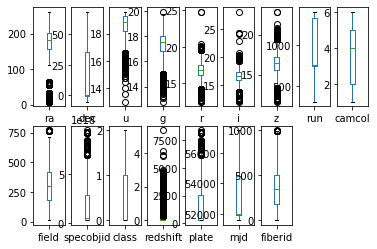

In [40]:
df.plot(kind='box',subplots=True,layout=(2,9))

* The boxplot methord shows the dataset has outliers .

In [41]:
# Checking Skewness

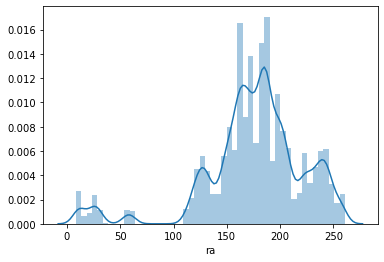

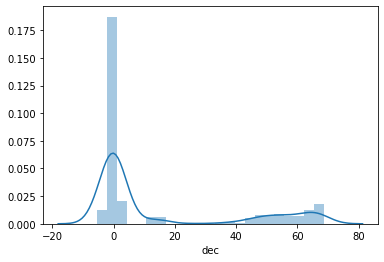

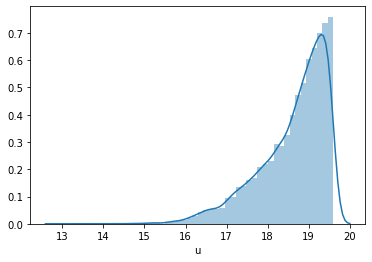

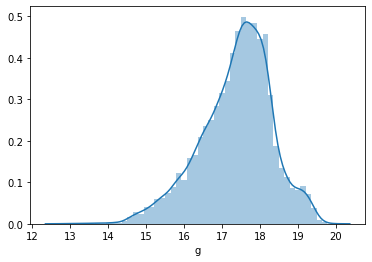

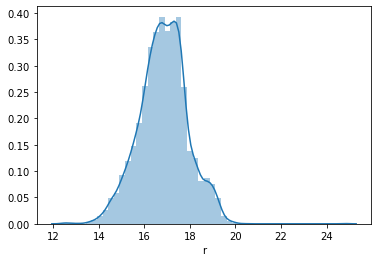

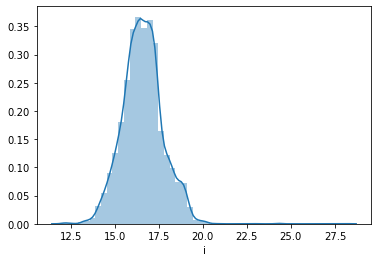

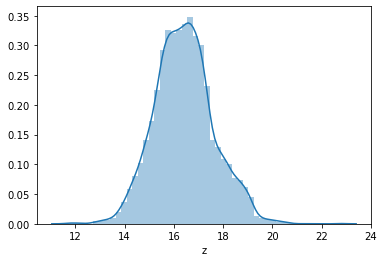

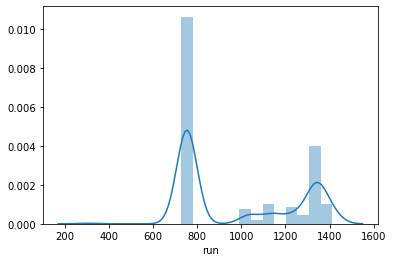

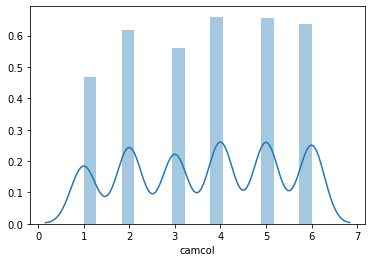

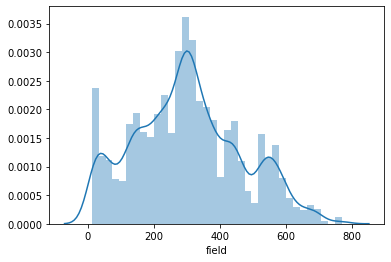

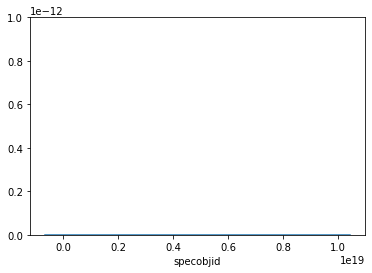

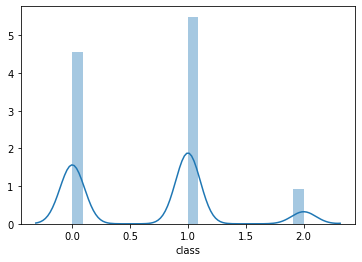

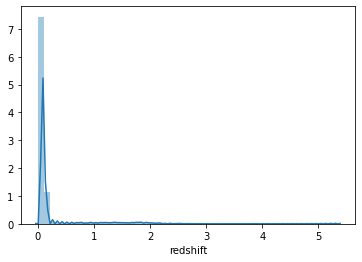

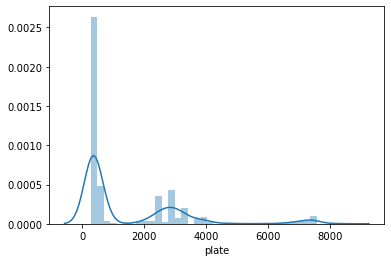

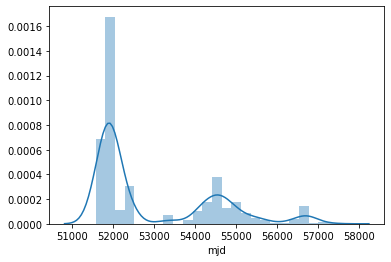

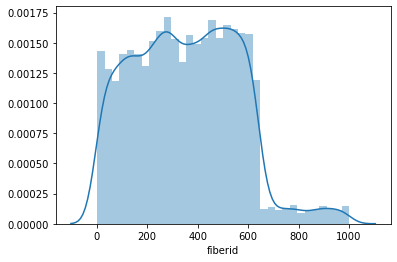

<Figure size 432x288 with 0 Axes>

In [42]:
for i in df.columns:
    sns.distplot(df[i])
    plt.xlabel(i)
    plt.figure()

In [43]:
df.skew()

ra          -1.227350
dec          1.191544
u           -1.219795
g           -0.536293
r           -0.021673
i            0.286442
z            0.214313
run          0.412555
camcol      -0.100220
field        0.249795
specobjid    1.794627
class        0.381391
redshift     4.265729
plate        1.794609
mjd          1.039610
fiberid      0.308053
dtype: float64

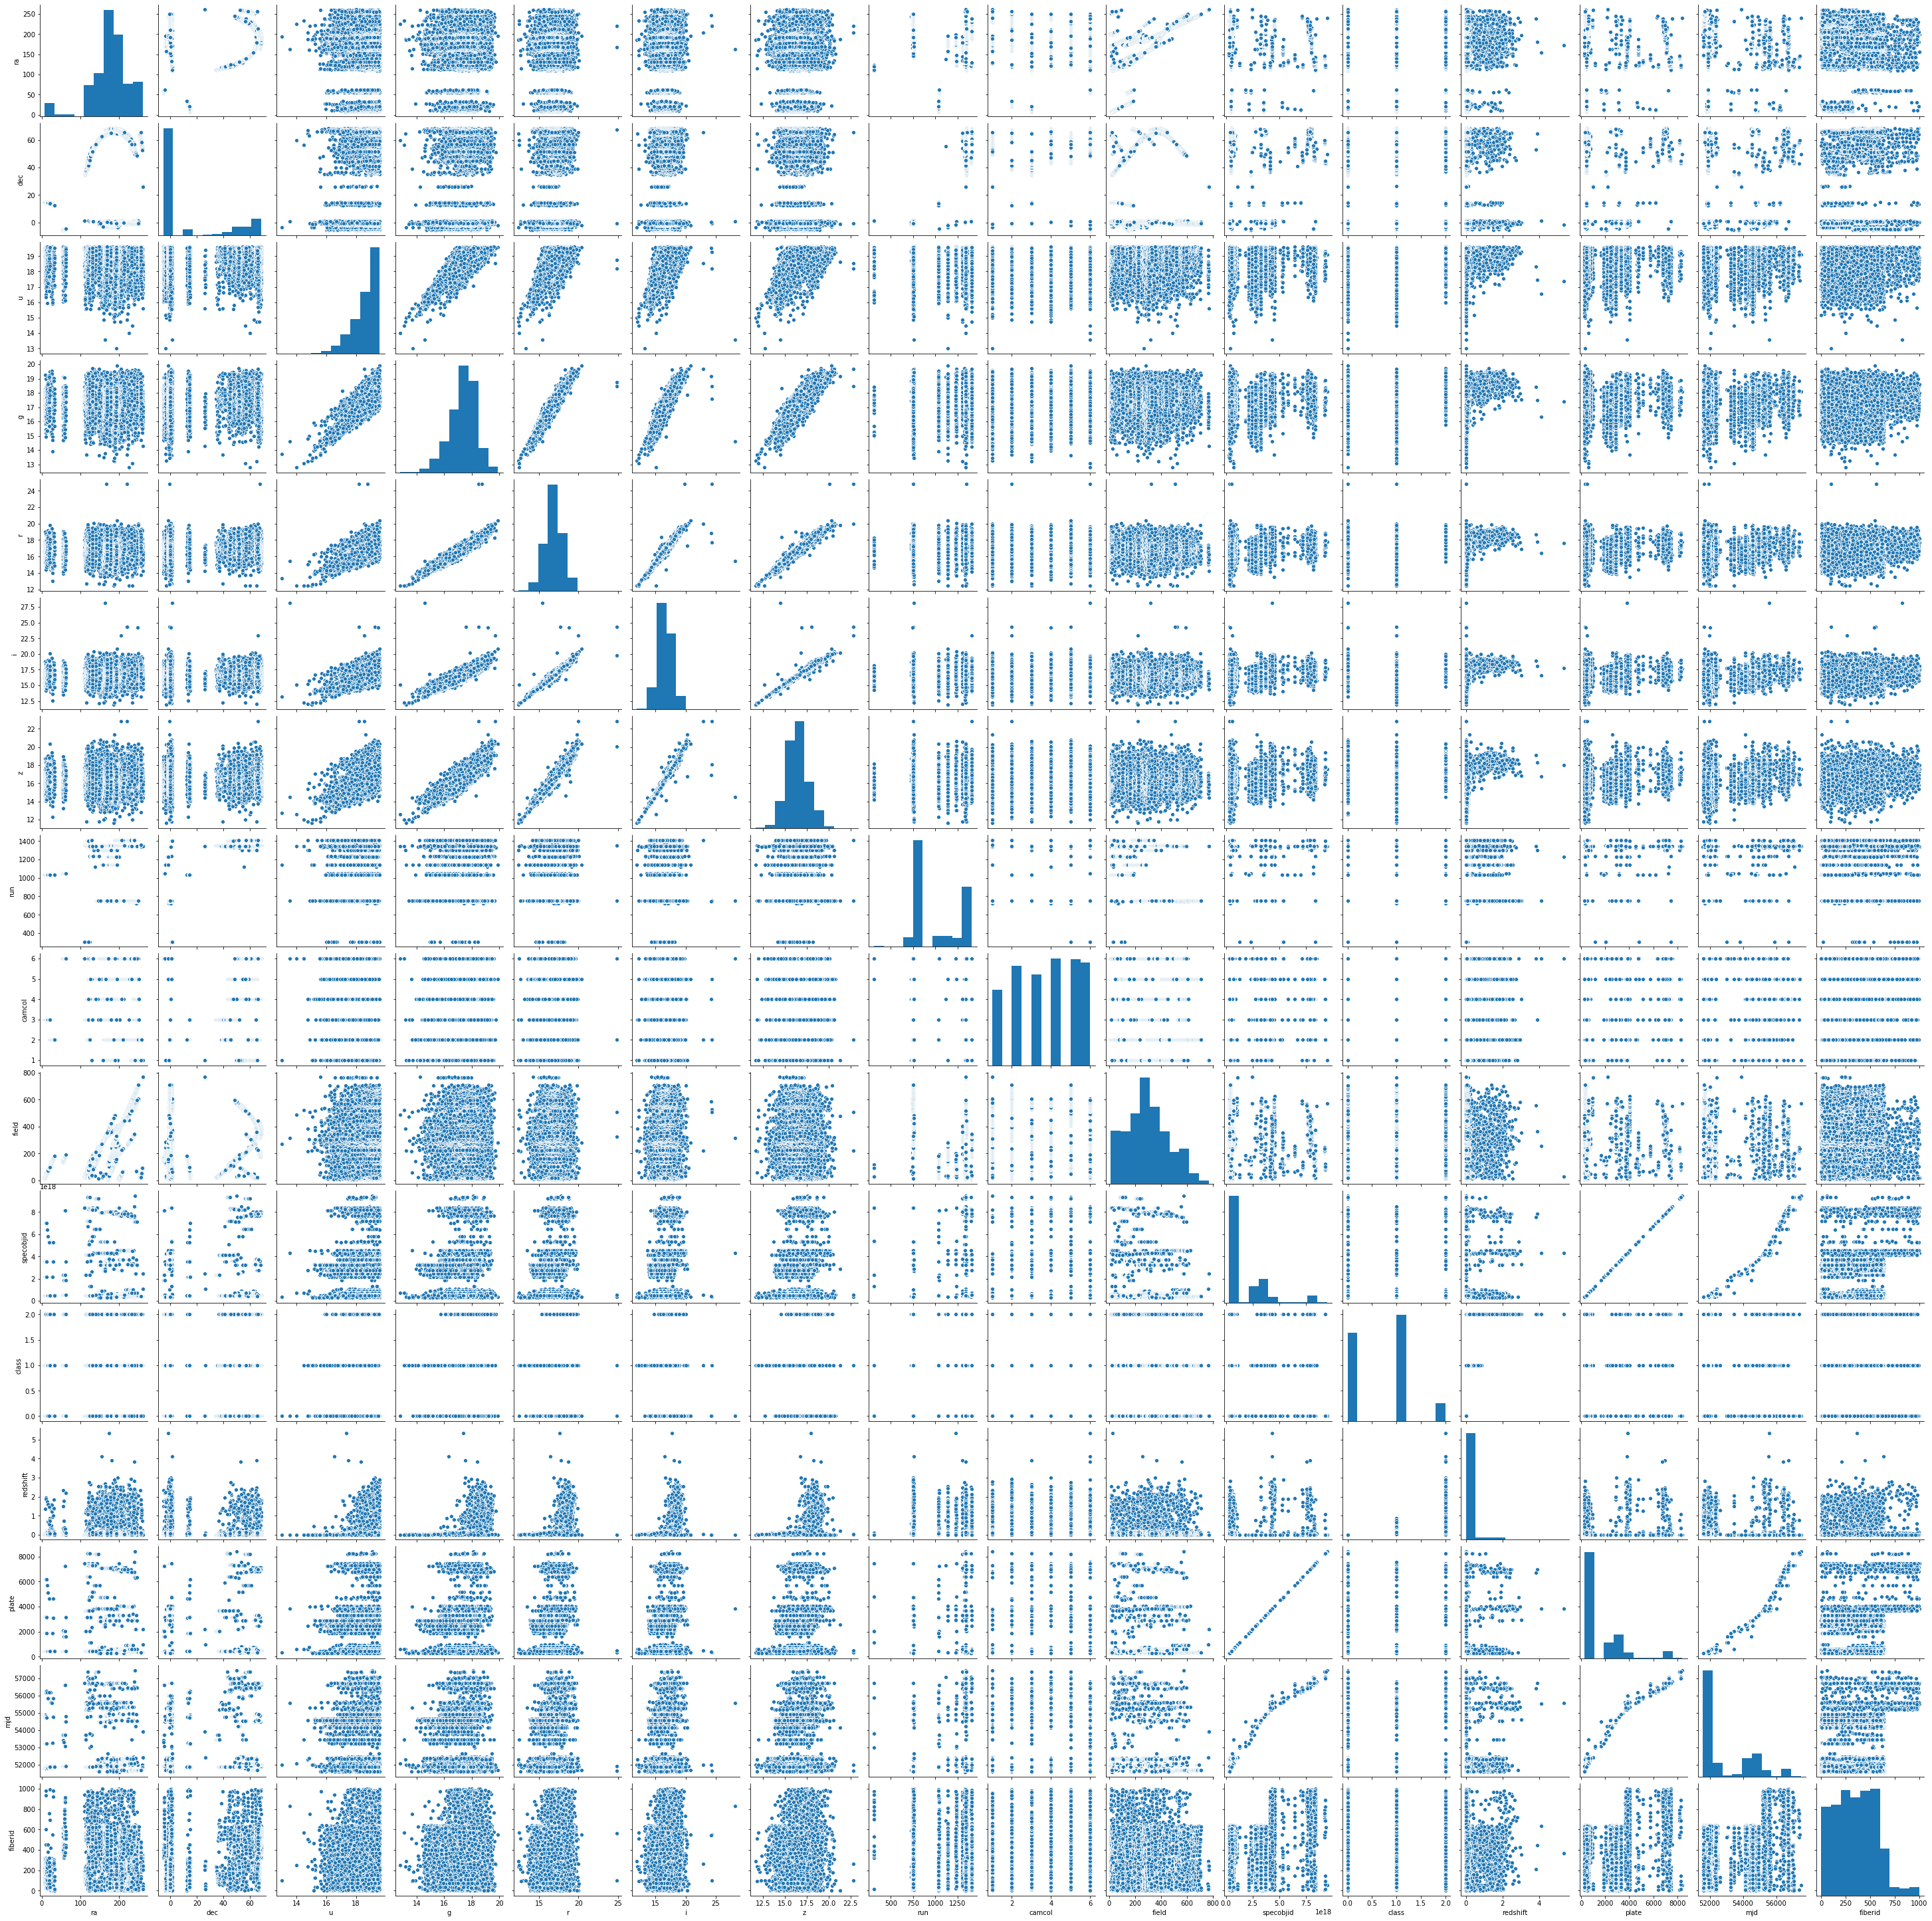

In [45]:
sns.pairplot(df)

* The distplot & pairplot shows the skewness is present in the dataset and df.skew() shows the mathematical representaion of skewness present in the dataset.

In [46]:
# Removing Skewness

In [47]:
from sklearn.preprocessing import power_transform
print(power_transform(df))

[[ 0.07408641 -0.29852842  1.32418059 ...  1.32678164  1.33879117
   0.7081785 ]
 [ 0.07573554 -0.28696465 -0.20368564 ... -0.80680079 -0.92440343
   0.90966661]
 [ 0.07774912 -0.28924255  1.11220308 ... -1.01795982 -0.62158161
   0.79763994]
 ...
 [-1.06731453  1.33754889 -0.06145018 ...  1.58529981  2.51820244
   1.22334937]
 [-1.06876571  1.33853454  0.13784767 ... -0.29912303 -0.71720956
  -0.4947363 ]
 [-1.06514946  1.33913207  0.87751907 ... -0.29912303 -0.71720956
  -0.47365745]]


* The skewness present in the dataset is removed from the dataset with the help of 'power transform' methord.

In [48]:
# Removing Outliers

In [49]:
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[0.16745842, 0.58492272, 1.03148637, ..., 1.03148936, 1.30931064,
        0.66863177],
       [0.16886159, 0.58311429, 0.05243046, ..., 0.63621258, 0.87919741,
        0.91101156],
       [0.17057433, 0.58347525, 0.92156796, ..., 0.65633905, 0.60919097,
        0.77527888],
       ...,
       [0.92039468, 1.46090664, 0.16753826, ..., 3.26608697, 2.69309363,
        1.3036668 ],
       [0.92197294, 1.46432109, 0.31801835, ..., 0.56688806, 0.70581092,
        0.60143828],
       [0.91804124, 1.46639319, 0.79229193, ..., 0.56688806, 0.70581092,
        0.5820479 ]])

In [50]:
thresold=3
print(np.where(z>3))

(array([  45,  109,  129, ..., 9994, 9997, 9997], dtype=int64), array([12, 12, 12, ..., 13, 10, 13], dtype=int64))


In [51]:
df_new=df[(z<3).all(axis=1)]

In [52]:
print(df.shape ,'\t',df_new.shape)

(10000, 16) 	 (8698, 16)


* The ouliers present in the dataset are removed from the dataset.
* The shape of the dataset is changed from to (10000,16) to (8698,16).

In [53]:
# Model Training

In [54]:
xn=df.drop(['class'],axis=1)

In [55]:
y=df['class']
y=pd.DataFrame(data=y)

In [56]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x=ss.fit_transform(xn)
x=pd.DataFrame(x,columns=xn.columns)

In [57]:
# Standard Scaler is used to scaling the data or normalising.

In [58]:
x.head()

ra       dec         u         g         r         i         z  \
0  0.167458 -0.584923  1.031486 -0.348559 -0.837280 -0.946058 -0.995342   
1  0.168862 -0.583114  0.052430 -0.166533 -0.154155 -0.082645 -0.026043   
2  0.170574 -0.583475  0.921568  0.867093  0.593154  0.441201  0.314528   
3  0.174558 -0.586501 -1.030630 -0.813627 -0.636692 -0.526604 -0.430921   
4  0.174825 -0.584412 -1.290232 -1.172519 -0.376762 -0.025101  0.158276   

        run    camcol     field  specobjid  redshift     plate       mjd  \
0 -0.838061  0.210852 -0.217630   1.031501 -0.369731  1.031489  1.309311   
1 -0.838061  0.210852 -0.217630  -0.636183 -0.369849 -0.636213 -0.879197   
2 -0.838061  0.210852 -0.211479  -0.656313 -0.053027 -0.656339 -0.609191   
3 -0.838061  0.210852 -0.205328   1.031506 -0.369993  1.031489  1.309311   
4 -0.838061  0.210852 -0.205328   1.031506 -0.368189  1.031489  1.309311   

    fiberid  
0  0.668632  
1  0.911012  
2  0.775279  
3  0.760736  
4  0.770431

In [59]:
y.head()

class
0      0
1      0
2      1
3      0
4      0

In [60]:
# Spiliting the data

In [61]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.22,random_state=40)

In [62]:
print(x_train.shape ,'\t',y_train.shape)

(7800, 15) 	 (7800, 1)


In [63]:
print(x_test.shape ,'\t',y_test.shape)

(2200, 15) 	 (2200, 1)


In [64]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [65]:
model=[DecisionTreeClassifier(),KNeighborsClassifier(),SVC()];

In [66]:
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print(m,'\n')
    print('accuracy score:',accuracy_score(y_test,predm),'\n')   
    print('confusion_matrix:','\n',confusion_matrix(y_test,predm),'\n')
    print('classification_report:','\n',classification_report(y_test,predm))
    print('**********************************************************************************************************************')
    print('\n')

DecisionTreeClassifier() 

accuracy score: 0.9854545454545455 

confusion_matrix: 
 [[ 893    4    0]
 [   1 1092   16]
 [   0   11  183]] 

classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       0.99      0.98      0.99      1109
           2       0.92      0.94      0.93       194

    accuracy                           0.99      2200
   macro avg       0.97      0.97      0.97      2200
weighted avg       0.99      0.99      0.99      2200

**********************************************************************************************************************


KNeighborsClassifier() 

accuracy score: 0.9068181818181819 

confusion_matrix: 
 [[ 770  126    1]
 [  48 1057    4]
 [  13   13  168]] 

classification_report: 
               precision    recall  f1-score   support

           0       0.93      0.86      0.89       897
           1       0.88      0.95      0.92      1109
     

* The DecisionTreeClassifier model gives the beat accuracy score i.e 0.9854.

In [67]:
# Finding the best parameters

In [68]:
from sklearn.model_selection import GridSearchCV

In [69]:
parameters={'criterion':['gini','entropy']}
dtc=DecisionTreeClassifier() 
clf=GridSearchCV(dtc,parameters)
clf.fit(x_train,y_train)
sorted(clf.cv_results_.keys())
print(clf.best_params_)

{'criterion': 'entropy'}


In [70]:
dtc=DecisionTreeClassifier('entropy') 
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
print('accuracy score:',accuracy_score(y_test,preddtc),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,preddtc),'\n')
print('classification_report:','\n',classification_report(y_test,preddtc))

accuracy score: 0.9868181818181818 

confusion_matrix: 
 [[ 894    3    0]
 [   1 1094   14]
 [   0   11  183]] 

classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       0.99      0.99      0.99      1109
           2       0.93      0.94      0.94       194

    accuracy                           0.99      2200
   macro avg       0.97      0.98      0.97      2200
weighted avg       0.99      0.99      0.99      2200



* The DecisionTreeClassifier model gives the beat accuracy score i.e 0.9868.

In [71]:
#Ensemble Techniques

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
rf=RandomForestClassifier(n_estimators=100,random_state=40)
rf.fit(x_train,y_train)
predrf=rf.predict(x_test)
rf.score(x_train,y_train)

1.0

In [74]:
print('accuracy score:',accuracy_score(y_test,predrf),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predrf),'\n')
print('classification_report:','\n',classification_report(y_test,predrf))

accuracy score: 0.9895454545454545 

confusion_matrix: 
 [[ 895    2    0]
 [   2 1101    6]
 [   0   13  181]] 

classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       0.99      0.99      0.99      1109
           2       0.97      0.93      0.95       194

    accuracy                           0.99      2200
   macro avg       0.98      0.97      0.98      2200
weighted avg       0.99      0.99      0.99      2200



* The DecisionTreeClassifier model gives the beat accuracy score i.e 0.9895.

In [75]:
# AdaBoostClassifier

In [76]:
from sklearn.ensemble import AdaBoostClassifier

In [77]:
ada=AdaBoostClassifier(base_estimator=dtc,n_estimators=100,random_state=40,algorithm='SAMME')
ada.fit(x_train,y_train)
predada=ada.predict(x_test)
ada.score(x_train,y_train)

1.0

In [78]:
print('accuracy score:',accuracy_score(y_test,predada),'\n')   
print('confusion_matrix:','\n',confusion_matrix(y_test,predada),'\n')
print('classification_report:','\n',classification_report(y_test,predada))

accuracy score: 0.9886363636363636 

confusion_matrix: 
 [[ 895    2    0]
 [   1 1095   13]
 [   0    9  185]] 

classification_report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       897
           1       0.99      0.99      0.99      1109
           2       0.93      0.95      0.94       194

    accuracy                           0.99      2200
   macro avg       0.97      0.98      0.98      2200
weighted avg       0.99      0.99      0.99      2200



* The AdaBoostClassification model using svc model gives accuracy score is 0.9886.

In [79]:
# Cross Validation

In [80]:
from sklearn.model_selection import cross_val_score

In [81]:
dtcscore=cross_val_score(ada,x,y,cv=5)
print(dtcscore)

[0.9865 0.99   0.9855 0.9855 0.987 ]


In [82]:
print(dtcscore.mean(),dtcscore.std())

0.9869 0.001655294535724665


* The cross validation is used to remove the underfitting and overfitting of the data.

In [83]:
# Plotting the predicted data and Y_test data

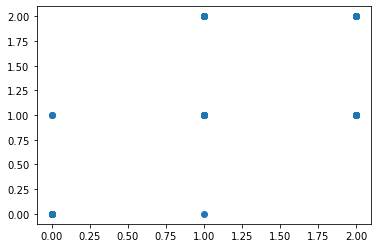

In [84]:
plt.scatter(y_test,predada)

In [85]:
# Saving the best model 

In [86]:
import joblib

In [87]:
joblib.dump(ada,'Space_dataset.pkl')

['Space_dataset.pkl']